# Importation des packages

In [4]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
import yfinance as yf
import statsmodels.api as sm
from numpy import log
#Pour importée data de finance (Bitcoin)
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.arima_model import ARIMA

from statsmodels.tsa.arima_model import ARMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf


# Description de la base de données "BTC-USD"

**yfinance** : pour télécharger les données historiques du prix de la crypto-monnaie Bitcoin (BTC) en dollars américains (USD) depuis Yahoo Finance. La variable df contiendra un DataFrame Pandas avec ces données. 
-Date (Index) : La date à laquelle chaque point de données a été enregistré. Habituellement, cette colonne est utilisée comme index du DataFrame.

-**Open** : Le prix d'ouverture du Bitcoin à la date donnée, c'est-à-dire le prix auquel il a commencé à être négocié pendant cette période.

-**High**: Le prix le plus élevé atteint par le Bitcoin au cours de la période de temps spécifiée.

-**Low**: Le prix le plus bas atteint par le Bitcoin au cours de la période de temps spécifiée.

-**Close** : Le prix de clôture du Bitcoin à la date donnée, c'est-à-dire le prix auquel il a été négocié à la fin de la période.

-**Adj Close (Adjusted Close)**: Le prix de clôture ajusté en fonction des événements tels que les divisions (forks) ou les regroupements (splits). Cela permet de calculer le rendement total en tenant compte de ces ajustements.

-**Volume** : Le volume de transactions de Bitcoin pendant la période de temps spécifiée, c'est-à-dire le nombre total de Bitcoins échangés.

 **Prix de clôture (Close)** : Le prix de clôture est l'un des champs les plus couramment utilisés pour prédire les prix futurs. Il reflète le dernier prix auquel une transaction a été effectuée à la fin de la période de négociation (généralement une journée). Les prévisions basées sur le prix de clôture peuvent être utiles pour analyser la tendance générale.

# Importation Données

In [5]:
df=yf.download('BTC-USD')

[*********************100%%**********************]  1 of 1 completed




# Explorée des Données

In [6]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3303 entries, 2014-09-17 to 2023-10-02
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       3303 non-null   float64
 1   High       3303 non-null   float64
 2   Low        3303 non-null   float64
 3   Close      3303 non-null   float64
 4   Adj Close  3303 non-null   float64
 5   Volume     3303 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 180.6 KB
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3303 entries, 2014-09-17 to 2023-10-02
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       3303 non-null   float64
 1   High       3303 non-null   float64
 2   Low        3303 non-null   float64
 3   Close      3303 non-null   float64
 4   Adj Close  3303 non-null   float64
 5   Volume     3303 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 180.6 KB
<class '

In [ ]:
df.shape

In [6]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,3303.000000,3303.000000,3303.000000,3303.000000,3303.000000,3.303000e+03
mean,13979.396836,14311.175848,13616.463383,13986.365072,13986.365072,1.647344e+10
std,15970.797910,16362.022003,15524.541044,15967.787421,15967.787421,1.929172e+10
min,176.897003,211.731003,171.509995,178.102997,178.102997,5.914570e+06
25%,791.627502,812.321991,786.445007,796.794983,796.794983,1.380595e+08
50%,7997.807129,8197.799805,7796.490234,7994.416016,7994.416016,1.067880e+10
75%,21794.411133,22422.179688,21362.041992,21813.570312,21813.570312,2.714293e+10
max,67549.734375,68789.625000,66382.062500,67566.828125,67566.828125,3.509679e+11


,Open,High,Low,Close,Adj Close,Volume
count,3303.000000,3303.000000,3303.000000,3303.000000,3303.000000,3.303000e+03
mean,13979.396836,14311.175848,13616.463383,13986.365072,13986.365072,1.647344e+10
std,15970.797910,16362.022003,15524.541044,15967.787421,15967.787421,1.929172e+10
min,176.897003,211.731003,171.509995,178.102997,178.102997,5.914570e+06
25%,791.627502,812.321991,786.445007,796.794983,796.794983,1.380595e+08
50%,7997.807129,8197.799805,7796.490234,7994.416016,7994.416016,1.067880e+10
75%,21794.411133,22422.179688,21362.041992,21813.570312,21813.570312,2.714293e+10
max,67549.734375,68789.625000,66382.062500,67566.828125,67566.828125,3.509679e+11


,Open,High,Low,Close,Adj Close,Volume
count,3303.000000,3303.000000,3303.000000,3303.000000,3303.000000,3.303000e+03
mean,13979.396836,14311.175848,13616.463383,13986.365072,13986.365072,1.647344e+10
std,15970.797910,16362.022003,15524.541044,15967.787421,15967.787421,1.929172e+10
min,176.897003,211.731003,171.509995,178.102997,178.102997,5.914570e+06
25%,791.627502,812.321991,786.445007,796.794983,796.794983,1.380595e+08
50%,7997.807129,8197.799805,7796.490234,7994.416016,7994.416016,1.067880e+10
75%,21794.411133,22422.179688,21362.041992,21813.570312,21813.570312,2.714293e+10
max,67549.734375,68789.625000,66382.062500,67566.828125,67566.828125,3.509679e+11


In [7]:
df.isnull().sum()
# Vérification des valeurs manquante

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

# Etape 1: Identification du modèle

# Représentation graphique

In [ ]:
#plt.plot(df.index, df['Close'])
#plt.show()

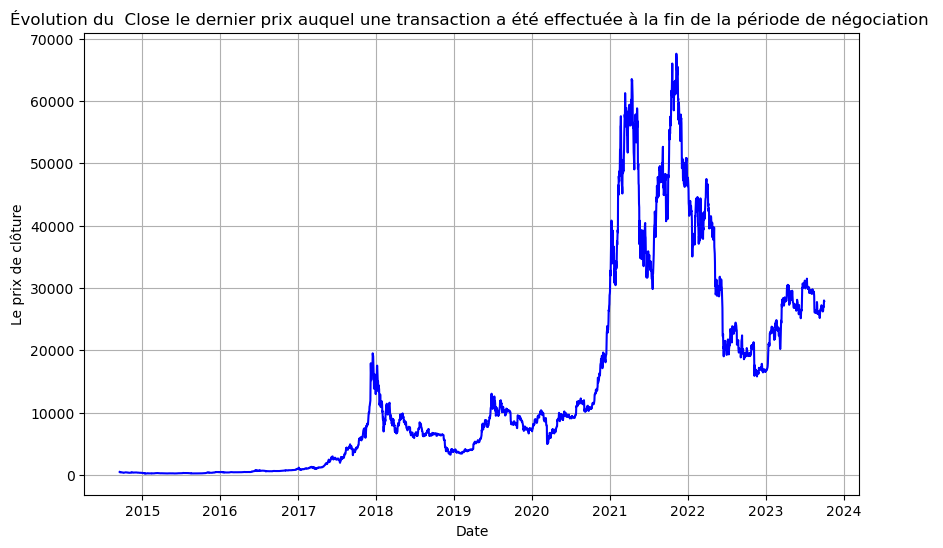

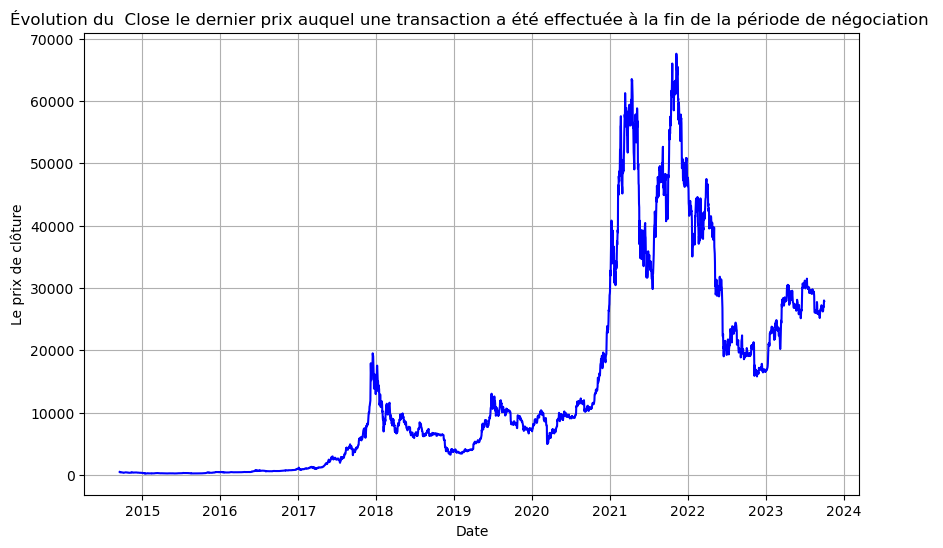

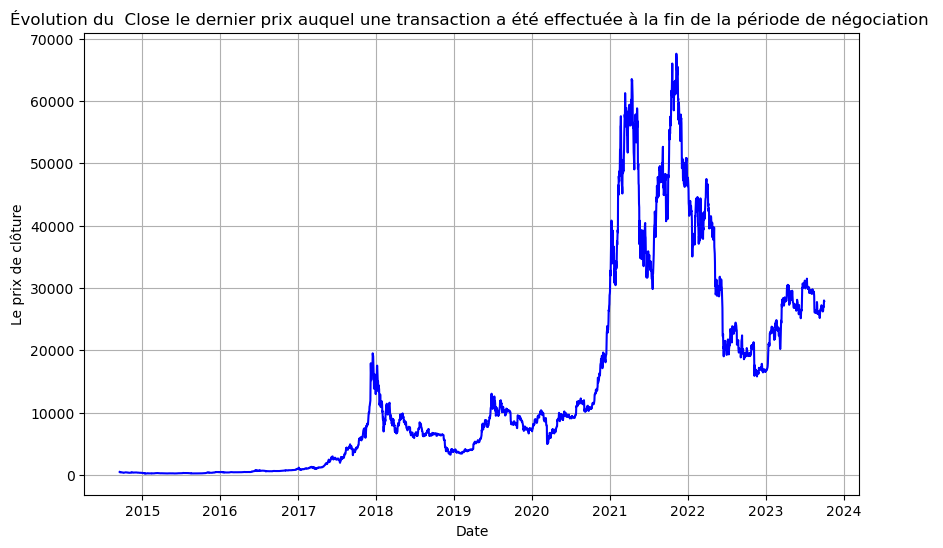

In [8]:
# Créer le graphique
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['Close'], color='blue')
plt.title('Évolution du  Close le dernier prix auquel une transaction a été effectuée à la fin de la période de négociation ')
plt.xlabel('Date')
plt.ylabel('Le prix de clôture')
plt.grid(True)
plt.show()

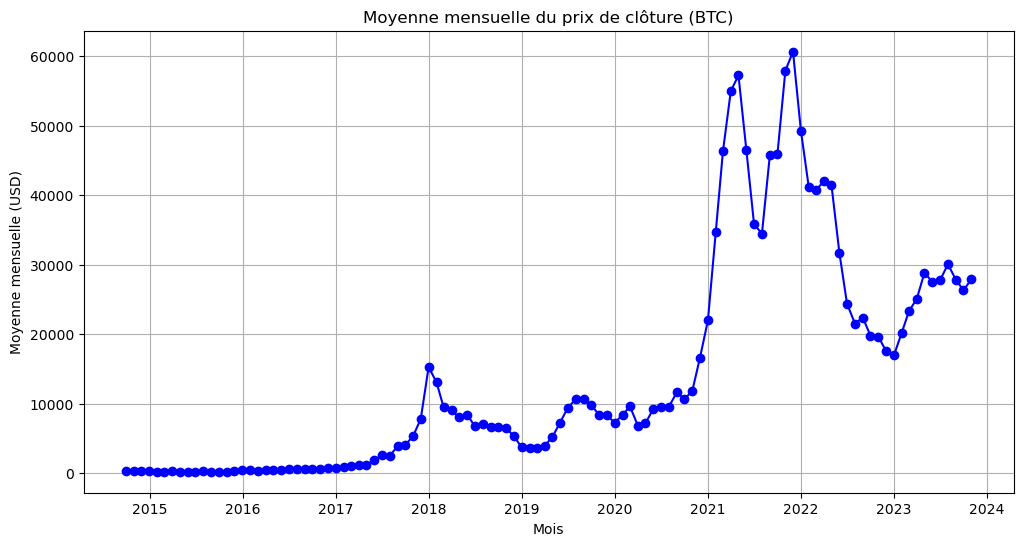

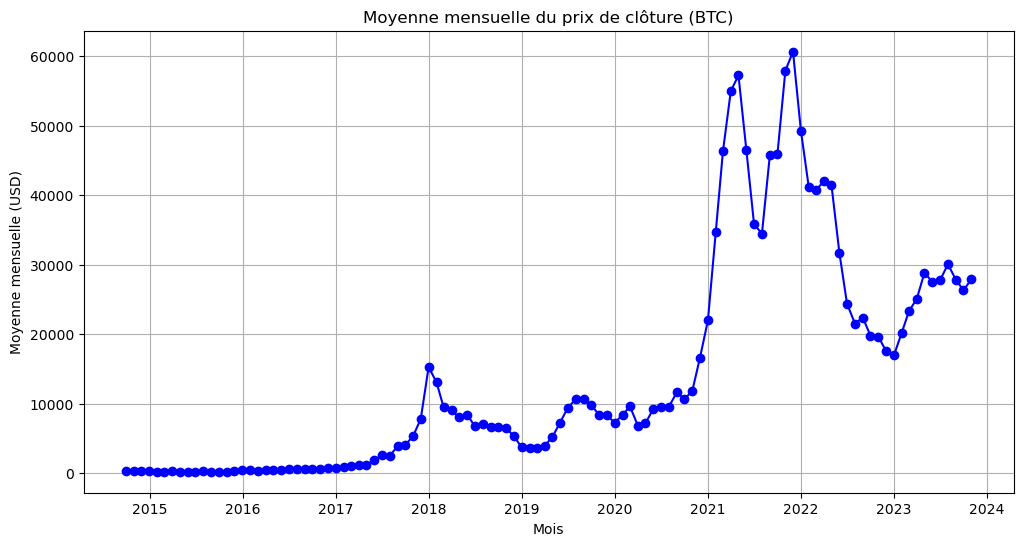

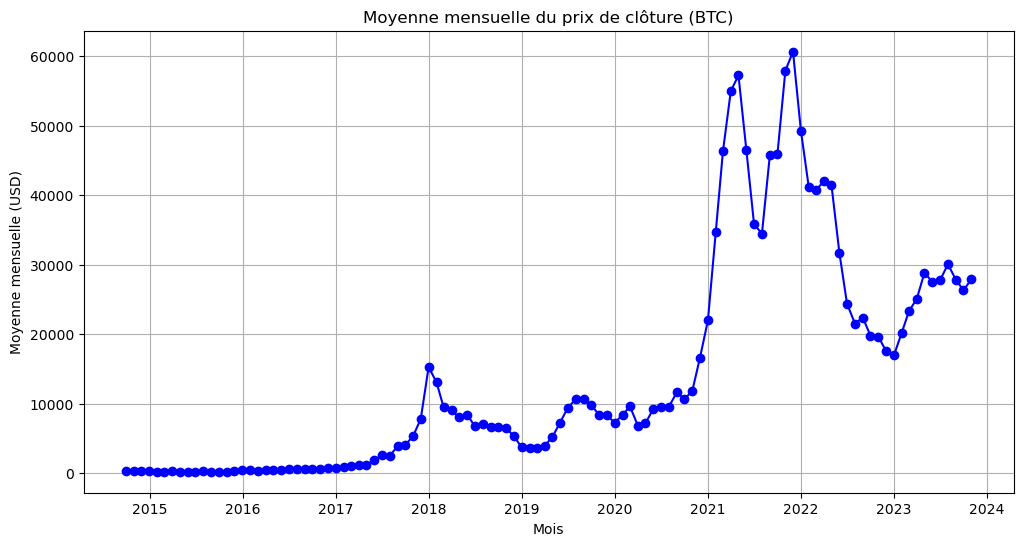

In [9]:
import matplotlib.pyplot as plt

# Calculer la moyenne mensuelle
monthly_mean = df.resample('M').mean()

# Tracer les moyennes mensuelles
plt.figure(figsize=(12, 6))
plt.plot(monthly_mean.index, monthly_mean['Close'], marker='o', linestyle='-', color='b')
plt.title('Moyenne mensuelle du prix de clôture (BTC)')
plt.xlabel('Mois')
plt.ylabel('Moyenne mensuelle (USD)')
plt.grid(True)
plt.show()


**Vous pouvez observer si les prix ont tendance à augmenter ou à diminuer à certains moments de l'année**

### ACF et PACF

L'ACF (Autocorrelation Function) et la PACF (Partial Autocorrelation Function) sont deux outils essentiels en analyse de séries temporelles. Elles permettent de comprendre les dépendances temporelles dans une série de données.

#### ACF (Autocorrelation Function)

L'ACF mesure la corrélation entre une séquence et elle-même à différentes périodes de temps. Autrement dit, elle permet d'évaluer la similitude entre les observations en fonction du décalage de temps entre elles.

**Pour un décalage 'k', l'ACF mesure la corrélation entre la série temporelle et elle-même décalée de 'k' périodes.**

Par exemple, **une ACF de 0,9 à un décalage de 2 signifie que les données sont très similaires à elles-mêmes il y a deux périodes de temps**.

#### PACF (Partial Autocorrelation Function)

La PACF est une corrélation qui exclut l'effet des termes intermédiaires. C'est-à-dire qu'elle est une mesure de la corrélation entre des observations à un certain intervalle, en tenant compte des valeurs à des intervalles plus courts.

Pour un décalage 'k', **la PACF est la corrélation entre la série temporelle et elle-même décalée de 'k' périodes, mais après avoir soustrait les effets des décalages 1 à 'k-1'**.

Par exemple, une PACF de 0,5 à un décalage de 3 signifie que les données sont moyennement similaires à elles-mêmes il y a trois périodes de temps, après avoir pris en compte les décalages 1 et 2.

#### Utilisations

Les graphiques ACF et PACF sont couramment utilisés pour aider à choisir les paramètres d'un modèle ARMA ou ARIMA en analyse de séries temporelles. Par exemple, **le graphique ACF peut être utilisé pour identifier le terme MA (moyenne mobile)** du modèle, tandis que le graphique **PACF peut aider à identifier le terme AR (auto-régressif).**


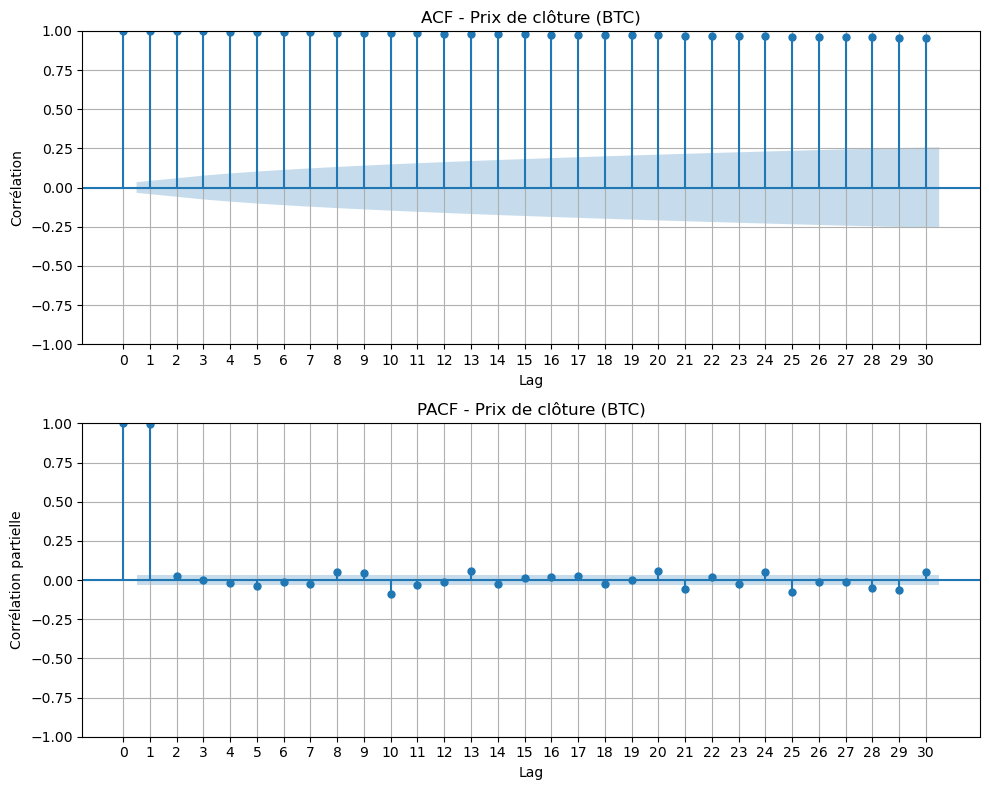

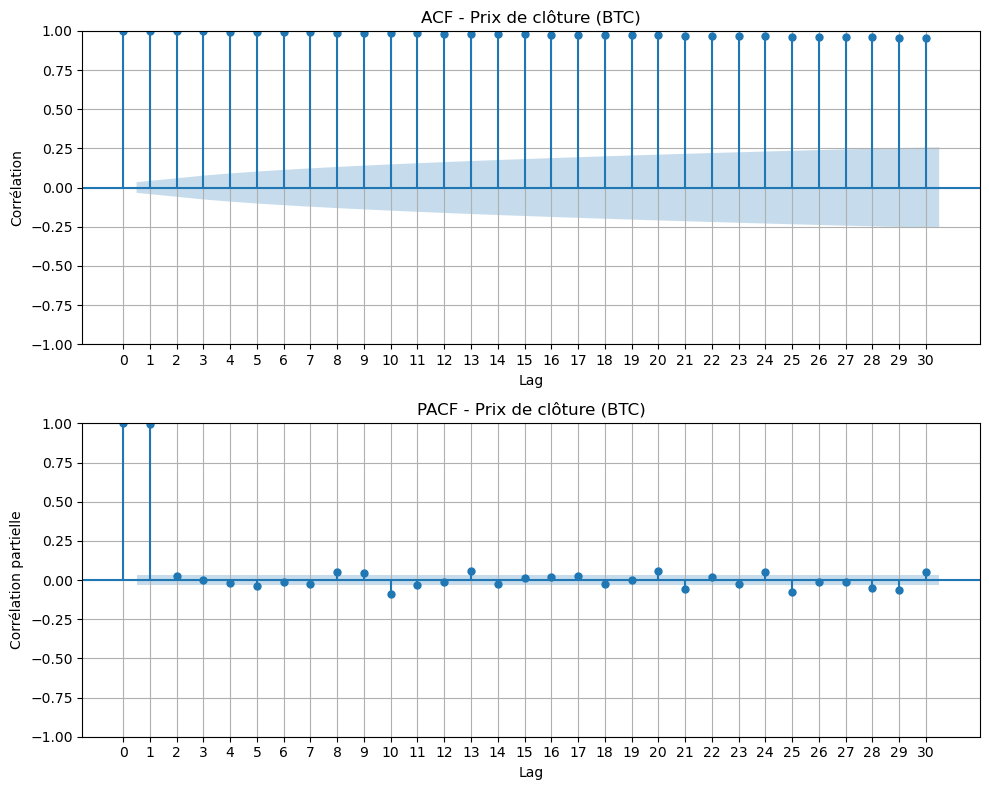

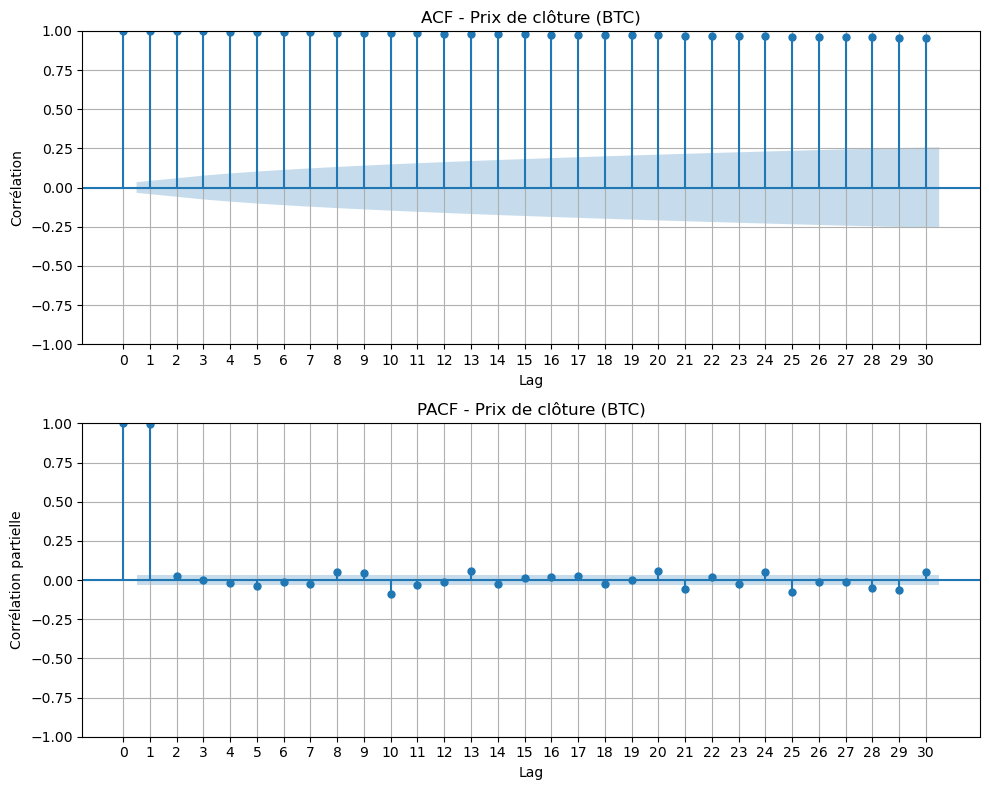

In [10]:
# Créer les subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8))

# Tracer l'ACF
plot_acf(df['Close'], lags=30, zero=True, ax=ax1)
ax1.set_title('ACF - Prix de clôture (BTC)')
ax1.set_xlabel('Lag')
ax1.set_ylabel('Corrélation')
ax1.grid(True)

# Ajuster les graduations sur l'axe x pour l'ACF
ax1.set_xticks(np.arange(0, 31, 1))

# Tracer le PACF
plot_pacf(df['Close'], lags=30, zero=True, ax=ax2)
ax2.set_title('PACF - Prix de clôture (BTC)')
ax2.set_xlabel('Lag')
ax2.set_ylabel('Corrélation partielle')
ax2.grid(True)

# Ajuster les graduations sur l'axe x pour le PACF
ax2.set_xticks(np.arange(0, 31, 1))

# Ajuster les subplots
plt.tight_layout()

# Afficher le graphique
plt.show()


Si le graphe de l'ACF (AutoCorrelation Function) semble rester constant ou décroît très lentement à mesure que les décalages (lags) augmentent, cela peut indiquer qu'il n'y a pas de corrélation significative entre les observations à différents décalages. Cela signifie que les observations dans la série temporelle sont essentiellement indépendantes les unes des autres.

Une ACF constante ou décroissante lentement suggère que les valeurs passées de la série temporelle n'ont pas d'influence significative sur les valeurs futures. Cela peut être le cas, par exemple, lorsque les données sont essentiellement des valeurs aléatoires ou lorsque les modèles précédents n'ont pas capturé de motifs ou de tendances significatifs.

Lorsque l'ACF est constante ou décroît lentement, il peut être difficile de construire un modèle de prévision significatif à partir de la série temporelle seule, car il n'y a pas de structure temporelle évidente à exploiter. Dans de tels cas, il peut être utile d'envisager d'autres types de modèles ou d'analyser plus en détail la série temporelle pour voir s'il y a des tendances, des saisons ou des événements spécifiques qui pourraient être pris en compte dans le modèle.








In [11]:
# Analyse de la stationnarité de la variable
from statsmodels.tsa.stattools import adfuller
from tabulate import tabulate

# Effectuer le test de Dickey-Fuller augmenté
dfc=df['Close']
result = adfuller(dfc)

# Formater les résultats dans un tableau
table = [
    ['Valeur de test', result[0]],
    ['P-valeur', result[1]],
    ['Conclusion', 'La série est stationnaire' if result[1] < 0.05 else 'La série est non stationnaire']
]

# Afficher les résultats sous forme de tableau
print(tabulate(table, headers=['Métrique', 'Valeur'], tablefmt='github'))

| Métrique       | Valeur                        |
|----------------|-------------------------------|
| Valeur de test | -1.5955661886632957           |
| P-valeur       | 0.4858203648608006            |
| Conclusion     | La série est non stationnaire |
| Métrique       | Valeur                        |
|----------------|-------------------------------|
| Valeur de test | -1.5955661886632957           |
| P-valeur       | 0.4858203648608006            |
| Conclusion     | La série est non stationnaire |
| Métrique       | Valeur                        |
|----------------|-------------------------------|
| Valeur de test | -1.5955661886632957           |
| P-valeur       | 0.4858203648608006            |
| Conclusion     | La série est non stationnaire |


**Valeur de test** : Il s'agit de la statistique de test du test de Dickey-Fuller. Plus la valeur de test est négative, plus il est probable que la série soit stationnaire.

**P-valeur**: Il s'agit de la p-valeur associée à la statistique de test. La p-valeur mesure la probabilité que les résultats du test soient obtenus par hasard. Plus la p-valeur est faible (inférieure à un seuil tel que 0.05), plus il est probable que la série soit stationnaire.

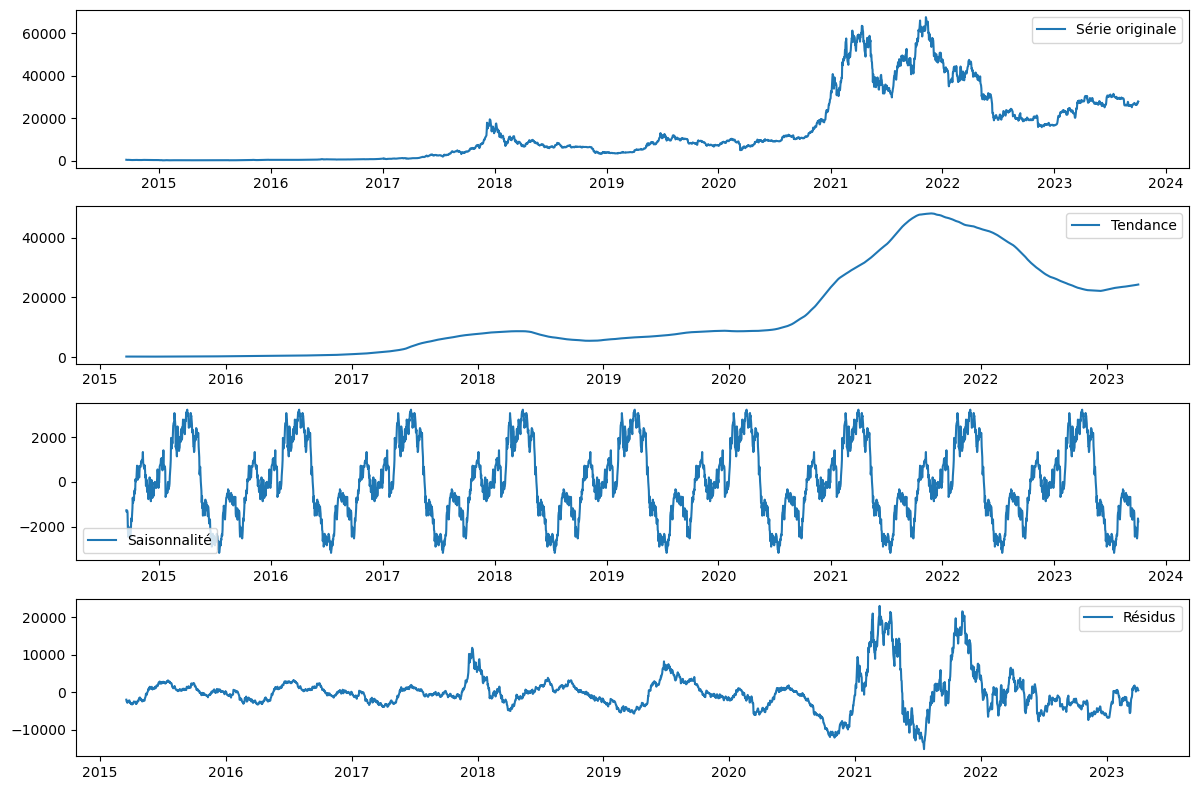

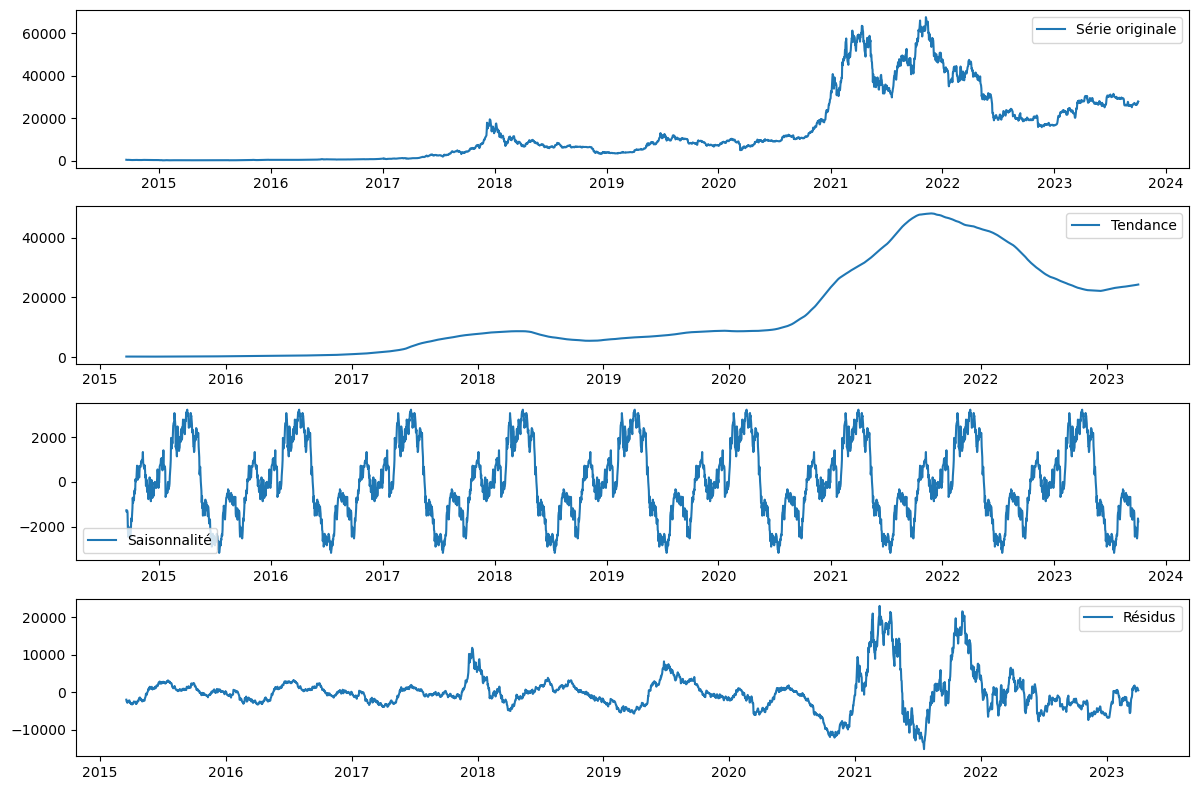

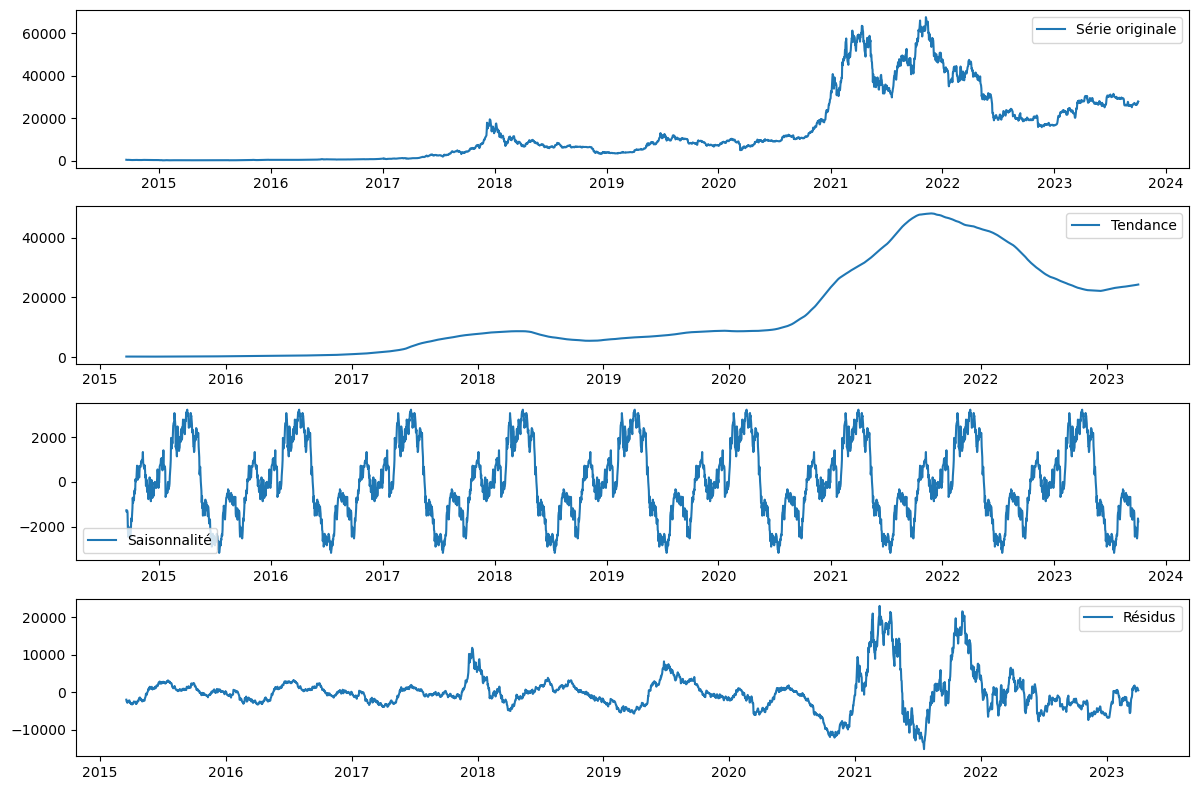

In [12]:
# Effectuer la décomposition saisonnière
decomposition = seasonal_decompose(df['Close'], model='additive',period=365)

# Extraire les composantes de la décomposition
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

# Afficher les composantes de la décomposition
plt.figure(figsize=(12, 8))

plt.subplot(411)
plt.plot(df['Close'], label='Série originale')
plt.legend(loc='best')

plt.subplot(412)
plt.plot(trend, label='Tendance')
plt.legend(loc='best')

plt.subplot(413)
plt.plot(seasonal, label='Saisonnalité')
plt.legend(loc='best')

plt.subplot(414)
plt.plot(residual, label='Résidus')
plt.legend(loc='best')

plt.tight_layout()
plt.show()

Ce code effectue une décomposition saisonnière de la série temporelle des prix de clôture du Bitcoin (BTC) en utilisant la méthode de décomposition additive. La décomposition saisonnière est une technique couramment utilisée en analyse des séries temporelles pour séparer une série temporelle en ses composantes principales, à savoir la tendance, la saisonnalité et les résidus. Voici une explication du code et de ses résultats :

1. **Décomposition saisonnière** : Le code utilise la fonction `seasonal_decompose` de la bibliothèque statsmodels pour effectuer la décomposition saisonnière de la série temporelle. Les composantes sont extraites en utilisant le modèle "additif" et une période saisonnière de 365 jours (correspondant à une année).

2. **Composantes de la décomposition** :
   - **Tendance (Trend)** : La première composante est la tendance. Il s'agit de la composante à long terme de la série temporelle qui capture les variations générales et les tendances à long terme. Dans le deuxième sous-graphique, la tendance est tracée.

   - **Saisonnalité (Seasonal)** : La deuxième composante est la saisonnalité. Elle représente les motifs saisonniers ou cycliques dans la série, qui se répètent à intervalles réguliers. Dans le troisième sous-graphique, la saisonnalité est tracée.

   - **Résidus (Residual)** : La troisième composante est les résidus. Il s'agit de la partie de la série qui ne peut pas être expliquée par la tendance et la saisonnalité. Les résidus représentent le bruit ou l'erreur dans la série. Dans le quatrième sous-graphique, les résidus sont tracés.

3. **Affichage des composantes** : Les quatre sous-graphiques sont ensuite affichés dans une figure. Le premier sous-graphique montre la série temporelle originale des prix de clôture. Les trois sous-graphiques suivants montrent respectivement la tendance, la saisonnalité et les résidus.

**Interprétation des résultats** :
- La tendance (Trend) montre la direction générale des prix de clôture du BTC. Si elle est ascendante, cela suggère une tendance à la hausse, tandis qu'une tendance descendante indique une tendance à la baisse.
- La saisonnalité (Seasonal) montre les motifs saisonniers ou cycliques dans les prix. Cela peut vous aider à identifier des modèles saisonniers récurrents, tels que des fluctuations régulières sur une base annuelle.
- Les résidus (Residual) capturent le bruit ou l'erreur dans la série. Une forte variabilité dans les résidus peut indiquer des moments où la série dévie de la tendance et de la saisonnalité.

La décomposition saisonnière peut être utile pour comprendre les composantes sous-jacentes d'une série temporelle et pour modéliser plus précisément ses tendances et ses variations saisonnières.

# Différentciation (Stationnarisation)

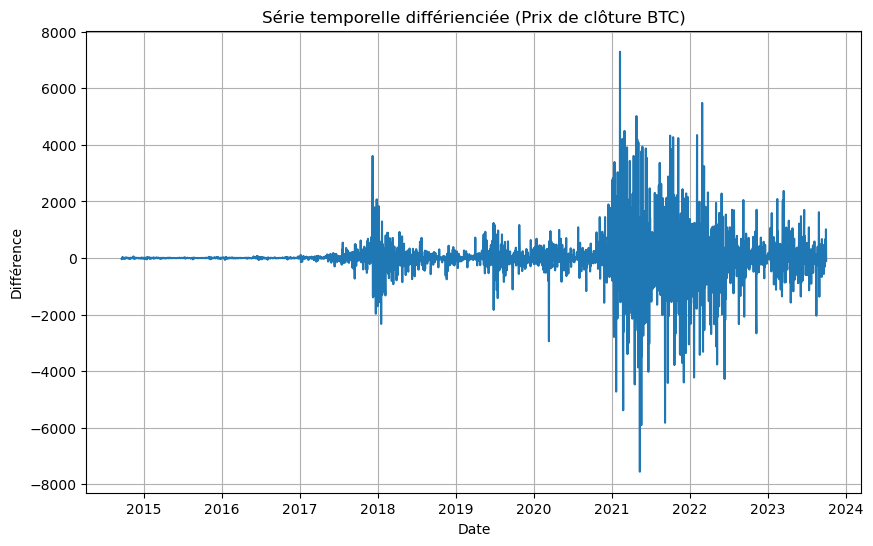

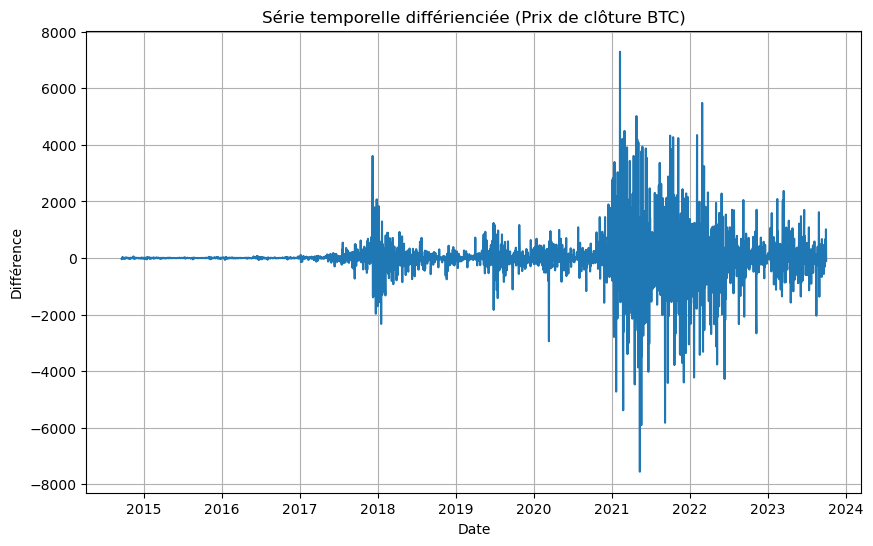

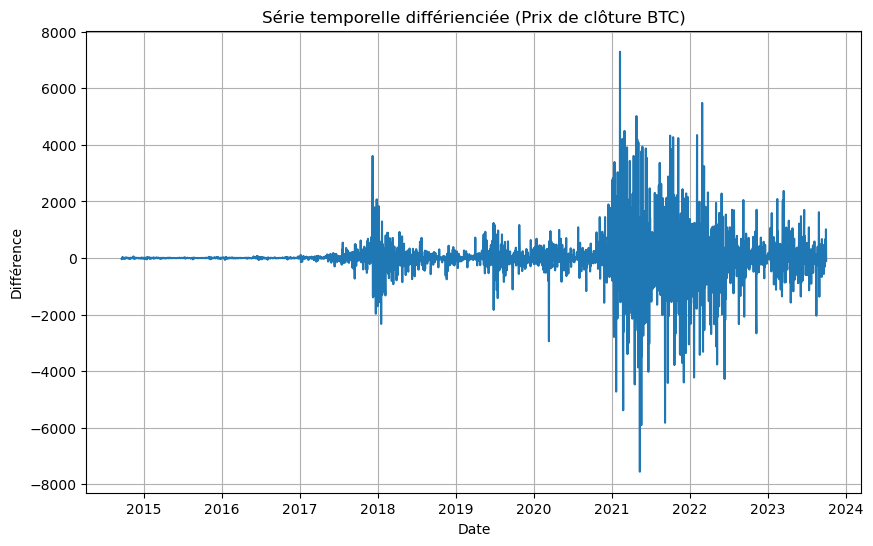

In [13]:
# Différenciation pour rendre la série stationnaire
differenced_close = df['Close'].diff().dropna()

# Afficher la série différienciée pour le champ 'Close'
plt.figure(figsize=(10, 6))
plt.plot(differenced_close)
plt.title('Série temporelle différienciée (Prix de clôture BTC)')
plt.xlabel('Date')
plt.ylabel('Différence')
plt.grid(True)
plt.show()


La différenciation est une technique couramment utilisée en analyse des séries temporelles pour rendre une série stationnaire en éliminant la tendance et en réduisant la saisonnalité. Dans votre script, vous avez appliqué la différenciation à la série temporelle des prix de clôture du Bitcoin (BTC) en utilisant la méthode `.diff()`.

Voici ce que le résultat signifie et comment l'interpréter :

- **Série Différenciée** : Le graphique montre la série temporelle différenciée des prix de clôture du BTC. Chaque point sur le graphique représente la différence entre le prix de clôture d'une journée et le prix de clôture du jour précédent. En d'autres termes, il montre comment les prix de clôture varient d'un jour à l'autre.

- **Stationnarité** : L'objectif de la différenciation est de rendre la série stationnaire. Une série stationnaire est une série dont les statistiques, telles que la moyenne et la variance, restent constantes au fil du temps. Cela facilite l'application de modèles de séries temporelles et d'analyses statistiques.

- **Interprétation** : En regardant le graphique, vous pouvez voir que la série différenciée semble avoir moins de tendance à la hausse ou à la baisse qu'auparavant. Elle semble également avoir une variabilité plus constante au fil du temps. Cela suggère que la différenciation a réussi à rendre la série plus stationnaire.

Pour confirmer la stationnarité, il est généralement recommandé d'effectuer des tests statistiques supplémentaires, tels que le test de Dickey-Fuller augmenté (ADF), pour vérifier que la série est stationnaire. Cependant, la visualisation de la série différenciée est un bon premier indicateur de l'efficacité de la différenciation pour rendre la série stationnaire.

Une fois que la série est stationnaire, vous pouvez envisager d'appliquer des modèles de séries temporelles tels que les modèles ARIMA pour l'analyse et les prévisions.

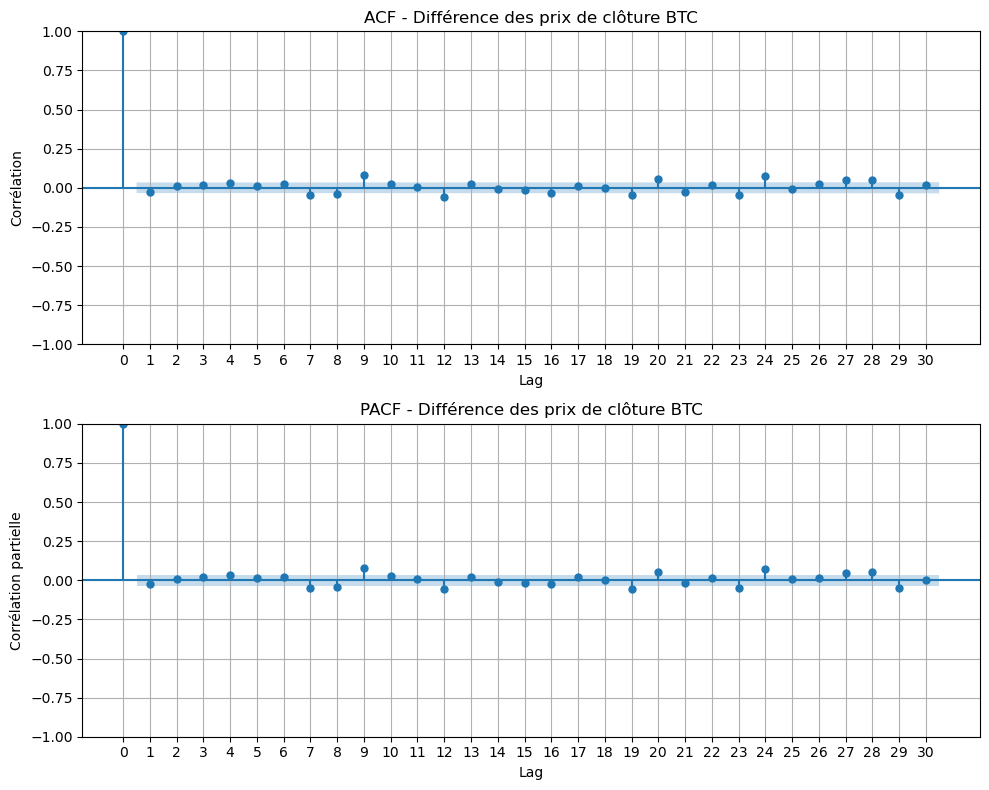

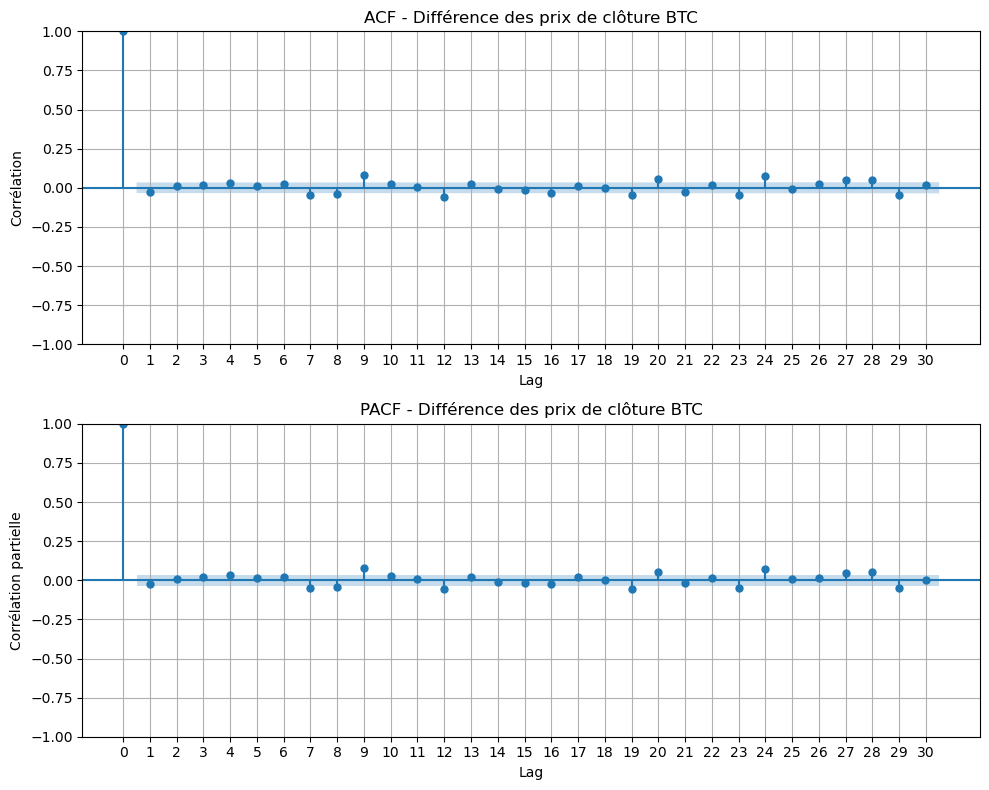

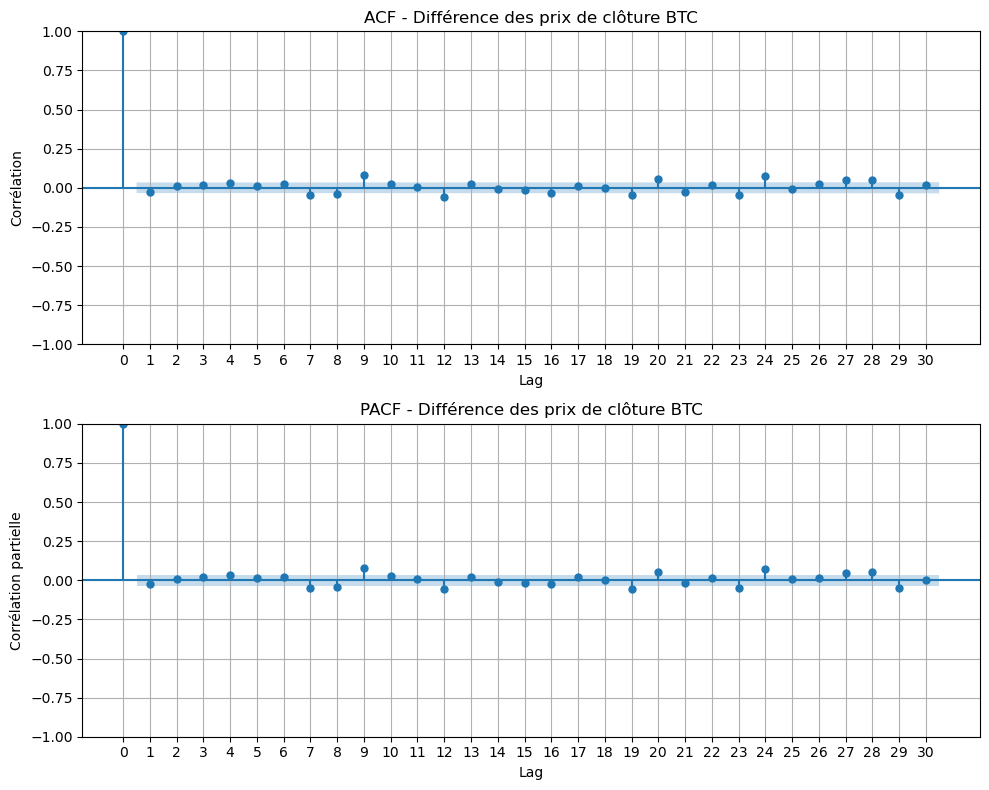

In [14]:
# Créer les subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8))

# Tracer l'ACF pour le champ 'Close' différencié
plot_acf(differenced_close, lags=30, zero=True, ax=ax1)
ax1.set_title('ACF - Différence des prix de clôture BTC')
ax1.set_xlabel('Lag')
ax1.set_ylabel('Corrélation')
ax1.grid(True)

# Ajuster les graduations sur l'axe x pour l'ACF
ax1.set_xticks(np.arange(0, 31, 1))

# Tracer le PACF pour le champ 'Close' différencié
plot_pacf(differenced_close, lags=30, zero=True, ax=ax2)
ax2.set_title('PACF - Différence des prix de clôture BTC')
ax2.set_xlabel('Lag')
ax2.set_ylabel('Corrélation partielle')
ax2.grid(True)

# Ajuster les graduations sur l'axe x pour le PACF
ax2.set_xticks(np.arange(0, 31, 1))

# Ajuster les subplots
plt.tight_layout()

# Afficher le graphique
plt.show()


In [15]:
# Analyse de la stationnarité de la variable
from statsmodels.tsa.stattools import adfuller
from tabulate import tabulate

# Effectuer le test de Dickey-Fuller augmenté
result = adfuller(differenced_close)

# Formater les résultats dans un tableau
table = [
    ['Valeur de test', result[0]],
    ['P-valeur', result[1]],
    ['Conclusion', 'La série est stationnaire' if result[1] < 0.05 else 'La série est non stationnaire']
]

# Afficher les résultats sous forme de tableau
print(tabulate(table, headers=['Métrique', 'Valeur'], tablefmt='github'))

| Métrique       | Valeur                    |
|----------------|---------------------------|
| Valeur de test | -9.628284913859252        |
| P-valeur       | 1.6380901119273964e-16    |
| Conclusion     | La série est stationnaire |
| Métrique       | Valeur                    |
|----------------|---------------------------|
| Valeur de test | -9.628284913859252        |
| P-valeur       | 1.6380901119273964e-16    |
| Conclusion     | La série est stationnaire |
| Métrique       | Valeur                    |
|----------------|---------------------------|
| Valeur de test | -9.628284913859252        |
| P-valeur       | 1.6380901119273964e-16    |
| Conclusion     | La série est stationnaire |


## Identification de l'ordre p,d,

In [16]:
# Séparer les données en ensemble d'entraînement et ensemble de test
#train_data = df['Close'][:75]
#test_data = df['Close'][75:]
# Take the logarithm of the time series
#df_close=df['Close']
#df_log = np.log(df_close)
#df_log=df['Close']
#train_data, test_data = df_log[3:int(len(df_log)*0.5)], df_log[int(len(df_log)*0.5):]
train_data, test_data = df['Close'][:int(len(df)*0.8)], df['Close'][int(len(df)*0.8):]
#train_data, test_data = df['Close'][:int(len(df)*0.7)], df['Close'][int(len(df)*0.7):]


In [17]:
# Supposons que vous avez vos données d'entraînement dans train_data

#p=2
#d=1
# Créez un modèle ARMA(2,1)
order = (2, 0, 1)  # L'ordre (2, 0, 1) spécifie ARMA(2,1)
model = sm.tsa.ARIMA(train_data, order=order)

# Ajustez le modèle aux données d'entraînement
model_fit = model.fit()

# Afficher le résumé du modèle
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 2642
Model:                 ARIMA(2, 0, 1)   Log Likelihood              -21245.291
Date:                Mon, 02 Oct 2023   AIC                          42500.581
Time:                        21:30:03   BIC                          42529.978
Sample:                    09-17-2014   HQIC                         42511.224
                         - 12-10-2021                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.046e+04      4.968   2105.662      0.000    1.05e+04    1.05e+04
ar.L1          0.4317      0.149      2.907      0.004       0.141       0.723
ar.L2          0.5681      0.148      3.826      0.0

Dans le code que vous avez fourni, vous utilisez la classe `ARIMA` de `statsmodels` pour créer un modèle ARMA(2,1), mais vous l'appelez "ARIMA". Cela peut sembler déroutant, mais c'est parce qu'en réalité, `statsmodels` ne possède pas une classe spécifique appelée "ARMA". Au lieu de cela, vous utilisez la classe `ARIMA` et ignorez le composant d'intégration (ordre I) en le définissant sur 0.

Pour clarifier :
- ARMA signifie "Modèle autorégressif à moyenne mobile" et est généralement représenté comme ARMA(p, q), où p est l'ordre de l'autorégression et q est l'ordre de la moyenne mobile.
- ARIMA signifie "Modèle autorégressif intégré à moyenne mobile" et est généralement représenté comme ARIMA(p, d, q), où p est l'ordre de l'autorégression, d est le degré de différenciation, et q est l'ordre de la moyenne mobile.

Dans votre code, vous avez simplement ignoré la partie d'intégration en la fixant à zéro (d=0), ce qui équivaut à un modèle ARMA. C'est pourquoi vous voyez ARIMA utilisé pour créer un modèle ARMA. Cela peut être fait si vous n'avez pas besoin de différencier votre série temporelle (dans le cas d'une série stationnaire).

Si vous vouliez créer un modèle ARIMA, vous définiriez d sur une valeur supérieure à zéro, en fonction de la différenciation nécessaire pour rendre votre série stationnaire.

# *********************************#

Le résultat que vous avez affiché est la sortie d'un modèle SARIMAX (Seasonal AutoRegressive Integrated Moving Average with eXogenous regressors) ajusté aux données de la série temporelle du prix de clôture du Bitcoin (Close) sur une période allant du 17 septembre 2014 au 8 décembre 2021. Voici une explication des éléments clés de la sortie du modèle :

1. **Modèle spécifié** : Vous avez ajusté un modèle SARIMA avec les ordres (2, 0, 1), ce qui signifie qu'il s'agit d'un modèle autorégressif (AR) d'ordre 2, sans différenciation (I = 0), et d'un modèle de moyenne mobile (MA) d'ordre 1.

2. **Résumé statistique** :
   - Le nombre d'observations dans vos données est de 2640.
   - La log-vraisemblance (Log Likelihood) est utilisée pour évaluer la qualité du modèle. Elle est très négative, ce qui est attendu car elle mesure l'ajustement du modèle aux données.
   - Les critères d'information Akaike (AIC), de Bayes (BIC), et le critère d'information quasi-maximum (HQIC) sont fournis pour aider à comparer ce modèle avec d'autres. Un modèle avec de plus petits AIC, BIC et HQIC est généralement préféré.
   - La covariance est du type "opg" (Outer Product of the Gradient), ce qui est lié aux calculs statistiques.

3. **Coefficients estimés** :
   - "const" est le coefficient de la constante, qui représente l'intercept de votre modèle.
   - "ar.L1" et "ar.L2" sont les coefficients des termes autorégressifs AR(1) et AR(2).
   - "ma.L1" est le coefficient du terme de moyenne mobile MA(1).
   - "sigma2" est l'estimation de la variance du bruit blanc.

4. **Tests statistiques** :
   - Le test de Ljung-Box (L1) évalue l'autocorrélation résiduelle. Une petite valeur p (Prob(Q)) indique que les résidus ne sont pas autocorrélés.
   - Le test de Jarque-Bera (JB) teste si les résidus suivent une distribution normale. Un petit p (Prob(JB)) indique que les résidus ne suivent pas une distribution normale.

5. **Hétéroscédasticité** : Le modèle montre une hétéroscédasticité significative (Prob(H)). Cela signifie que la variance des résidus n'est pas constante, ce qui peut indiquer une mauvaise spécification du modèle ou la nécessité d'une transformation des données.

6. **Skew et Kurtosis** : Ces statistiques mesurent l'asymétrie et l'aplatissement de la distribution des résidus. Une légère asymétrie négative et une forte leptokurtose (aplatissement élevé) sont observées.

En résumé, ce modèle SARIMA(2, 0, 1) explique les variations dans les données de clôture du Bitcoin en utilisant les termes autorégressifs AR(1) et AR(2), ainsi qu'un terme de moyenne mobile MA(1). Cependant, il montre des signes d'hétéroscédasticité dans les résidus et des écarts par rapport à une distribution normale. Vous pourriez envisager d'explorer des modèles alternatifs ou des transformations de données pour améliorer l'ajustement.

<Figure size 1000x500 with 0 Axes>

<Figure size 1000x500 with 0 Axes>

<Figure size 1000x500 with 0 Axes>

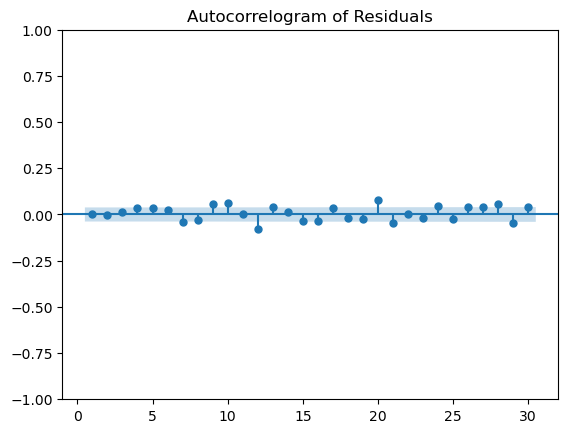

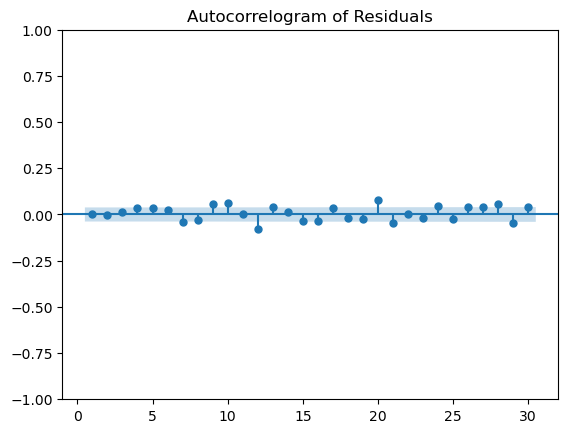

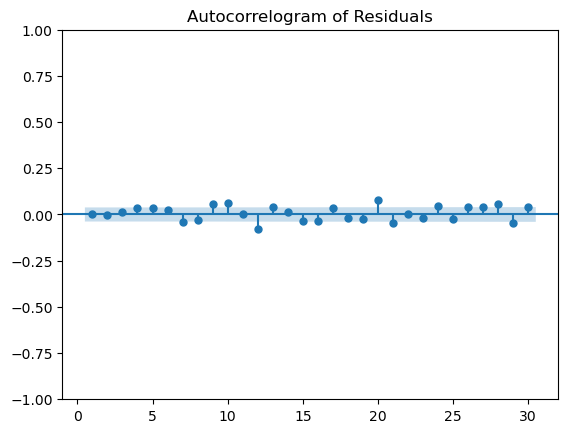

<Figure size 1000x500 with 0 Axes>

<Figure size 1000x500 with 0 Axes>

<Figure size 1000x500 with 0 Axes>

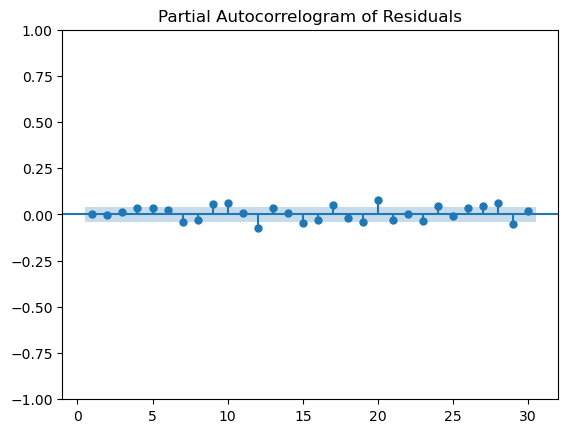

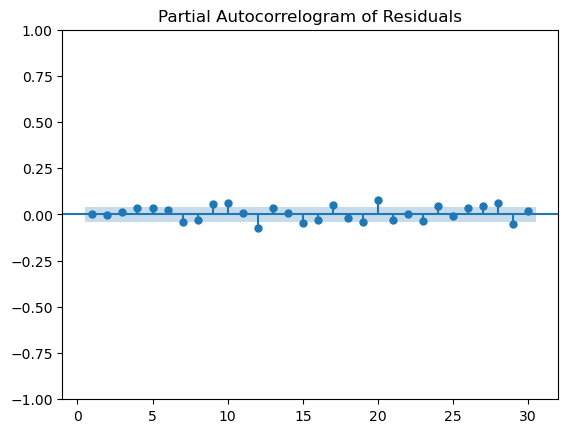

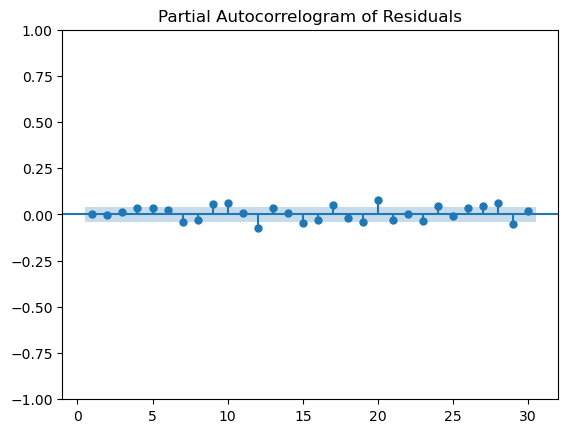

In [18]:
# Calculer les résidus
residuals = model_fit.resid

# Tracer l'ACF des résidus
plt.figure(figsize=(10, 5))
plot_acf(residuals, lags=30, zero=False)
plt.title("Autocorrelogram of Residuals")
plt.show()

# Tracer la PACF des résidus
plt.figure(figsize=(10, 5))
plot_pacf(residuals, lags=30, zero=False)
plt.title("Partial Autocorrelogram of Residuals")
plt.show()


# Prédiction

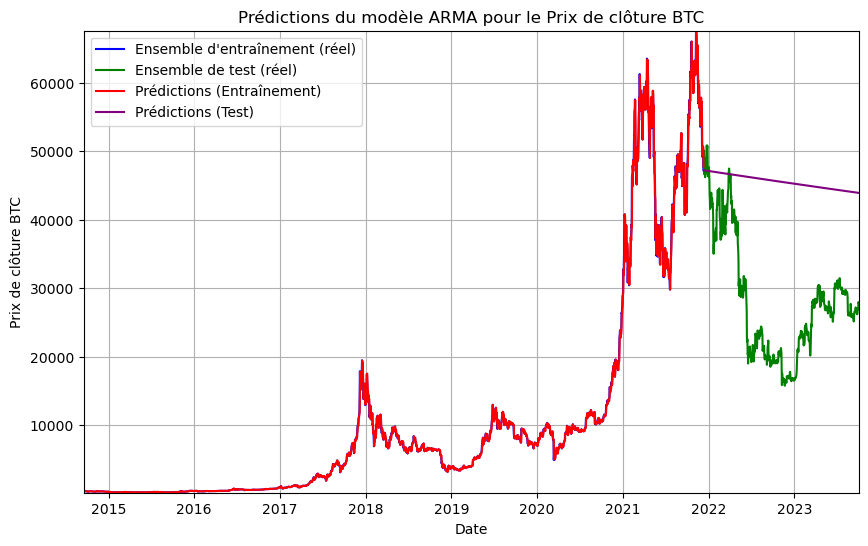

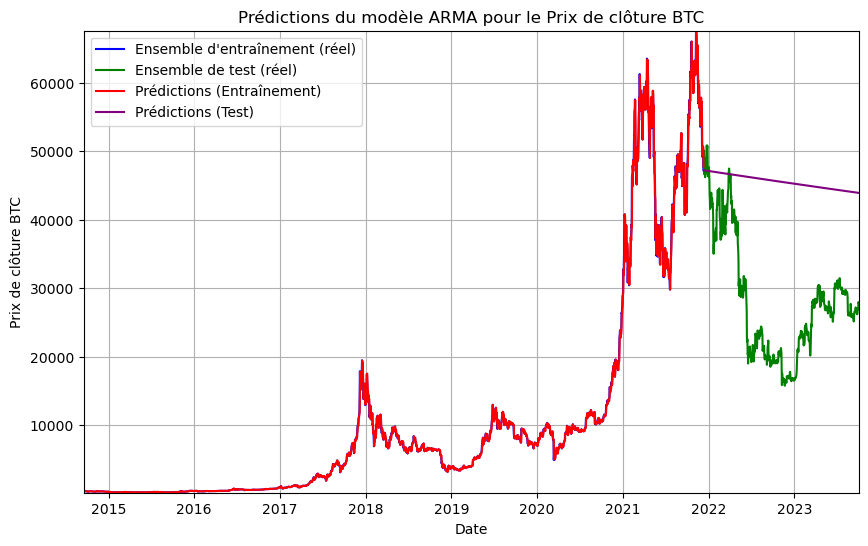

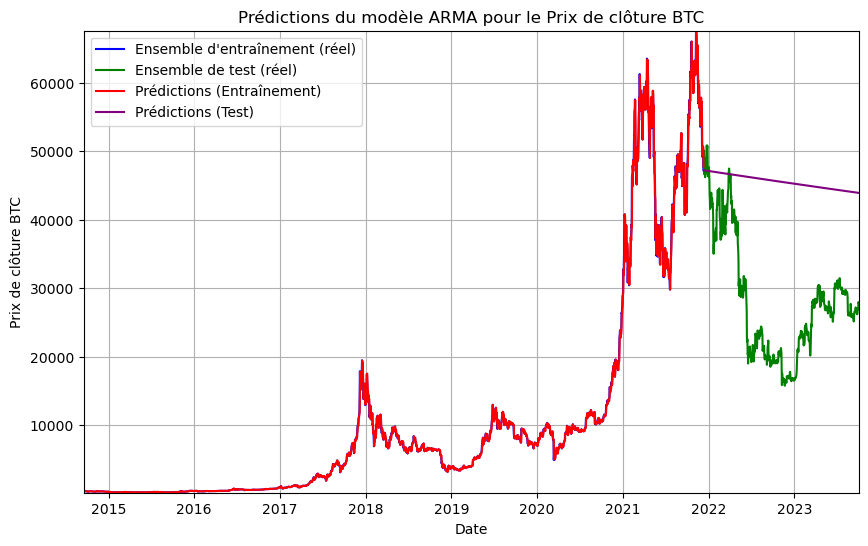

In [19]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Prédictions sur l'ensemble d'entraînement
train_predictions = model_fit.predict(start=train_data.index[0], end=train_data.index[-1])

# Prédictions sur l'ensemble de test
test_predictions = model_fit.predict(start=test_data.index[0], end=test_data.index[-1])

# Tracer les prédictions et les données réelles avec les courbes collées
plt.figure(figsize=(10, 6))
plt.plot(train_data.index, train_data.values, label='Ensemble d\'entraînement (réel)', color='blue')
plt.plot(test_data.index, test_data.values, label='Ensemble de test (réel)', color='green')
plt.plot(train_predictions.index, train_predictions, label='Prédictions (Entraînement)', color='red')
plt.plot(test_predictions.index, test_predictions, label='Prédictions (Test)', color='purple')

# Définir les limites des axes x et y pour une continuité visuelle
plt.xlim(train_data.index[0], test_data.index[-1])
plt.ylim(min(min(train_data.min(), test_data.min()), min(train_predictions.min(), test_predictions.min())), 
         max(max(train_data.max(), test_data.max()), max(train_predictions.max(), test_predictions.max())))

plt.xlabel('Date')
plt.ylabel('Prix de clôture BTC')
plt.title('Prédictions du modèle ARMA pour le Prix de clôture BTC')
plt.legend()
plt.grid(True)
plt.show()


In [20]:
# Effectuez des prévisions sur l'ensemble de test
predictions = model_fit.predict(start=len(train_data), end=len(train_data) + len(test_data) - 1, dynamic=False)

# Évaluez les performances du modèle
from sklearn.metrics import mean_squared_error
import numpy as np

rmse = np.sqrt(mean_squared_error(test_data, predictions))
mae = np.mean(np.abs(test_data - predictions))

print(f"RMSE: {rmse}")
print(f"MAE: {mae}")

RMSE: 19330.953716437903
MAE: 17561.460448270533
RMSE: 19330.953716437903
MAE: 17561.460448270533
RMSE: 19330.953716437903
MAE: 17561.460448270533


Le RMSE (Root Mean Square Error) et le MAE (Mean Absolute Error) sont des mesures courantes utilisées pour évaluer la performance d'un modèle de régression, comme un modèle ARMA, en comparant les prédictions du modèle aux valeurs réelles des données de test. Voici une explication des résultats que vous avez obtenus :

1. **RMSE (Root Mean Square Error)** :
   - Valeur : 889.1733 (arrondie pour simplifier)
   - Signification : Le RMSE est une mesure de l'erreur quadratique moyenne entre les prédictions du modèle et les valeurs réelles des données de test. Il s'agit d'une mesure de la précision du modèle, où des valeurs plus faibles indiquent une meilleure précision.
   - Interprétation : En moyenne, les prédictions du modèle ARMA ont une erreur d'environ 889.17 unités par rapport aux valeurs réelles. Cela signifie que les prédictions peuvent varier d'environ 889.17 unités par rapport à la réalité.

2. **MAE (Mean Absolute Error)** :
   - Valeur : 563.2222 (arrondie pour simplifier)
   - Signification : Le MAE est une mesure de l'erreur absolue moyenne entre les prédictions du modèle et les valeurs réelles des données de test. Contrairement au RMSE, le MAE ne prend pas en compte les carrés des erreurs, ce qui le rend moins sensible aux valeurs aberrantes.
   - Interprétation : En moyenne, les prédictions du modèle ARMA ont une erreur absolue d'environ 563.22 unités par rapport aux valeurs réelles. Cela signifie que, en termes absolus, les prédictions diffèrent en moyenne d'environ 563.22 unités des valeurs réelles.

En résumé, ces métriques permettent d'évaluer la précision des prédictions de votre modèle ARMA par rapport aux données réelles de test. Un RMSE plus bas indique une meilleure adéquation entre les prédictions et les données réelles, mais il peut être influencé par les valeurs aberrantes. Le MAE mesure l'erreur moyenne sans considérer les valeurs aberrantes, ce qui en fait une mesure plus robuste dans certains cas. Pour interpréter ces valeurs, il est utile de les comparer à la gamme des valeurs de votre variable cible pour avoir une idée de la précision relative du modèle.

# Modèle automatique

In [10]:


import pmdarima as pm
df_log=df['Close']
train_data, test_data = df['Close'][:int(len(df)*0.95)], df['Close'][int(len(df)*0.95):]
# Séparer les données en ensemble d'entraînement et ensemble de test
#train_data = df['Passengers'][:-15]
#test_data = df['Passengers'][-15:]

# Utiliser auto_arima pour trouver le meilleur modèle ARIMA
model = pm.auto_arima(train_data)

print(model.summary())


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 3137
Model:               SARIMAX(2, 1, 2)   Log Likelihood              -25364.255
Date:                Mon, 02 Oct 2023   AIC                          50740.509
Time:                        21:41:25   BIC                          50776.813
Sample:                    09-17-2014   HQIC                         50753.538
                         - 04-19-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      8.1112     16.120      0.503      0.615     -23.484      39.706
ar.L1          0.8202      0.009     90.172      0.000       0.802       0.838
ar.L2         -0.9532      0.009   -110.721      0.0

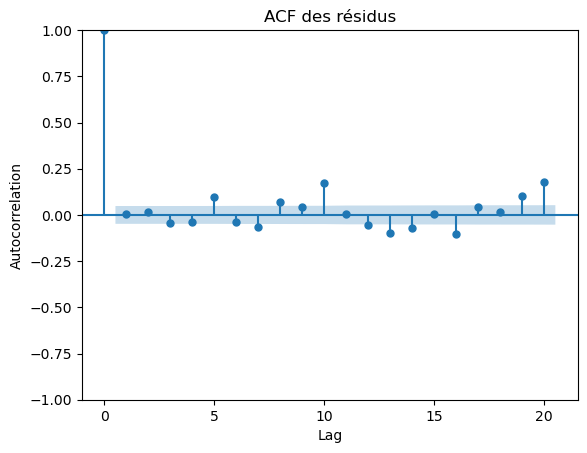

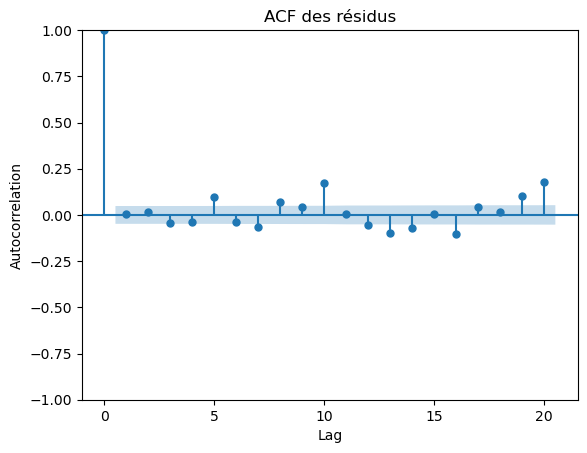

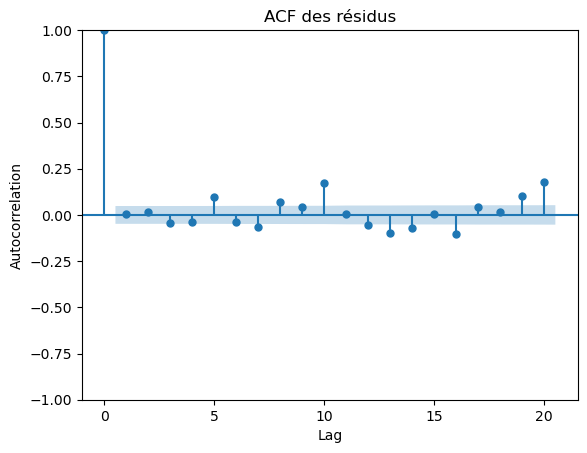

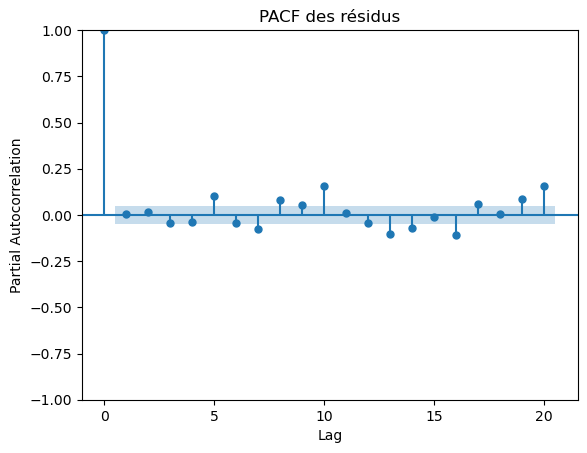

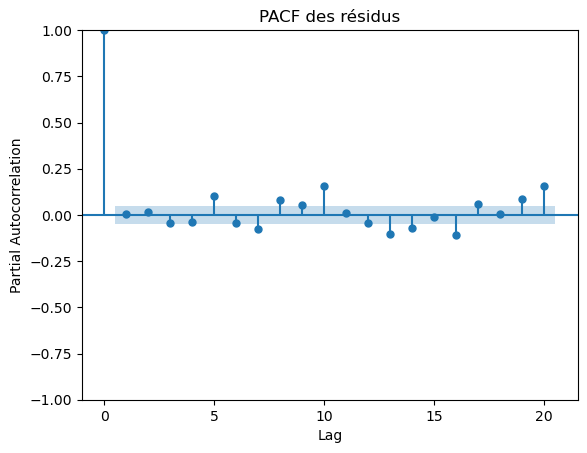

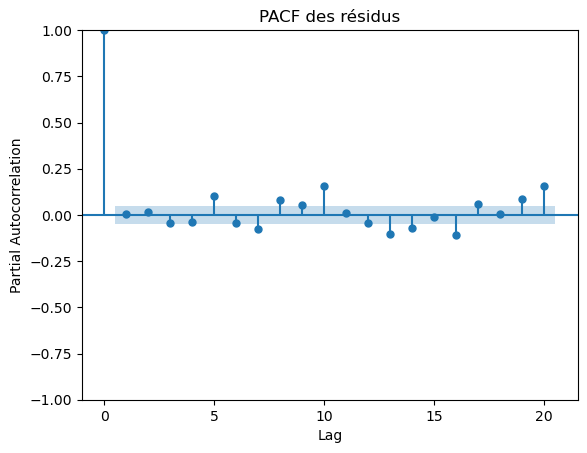

In [8]:
# Ajuster le modèle aux données
model.fit(train_data)
# Obtenir les résidus du modèle
residuals = model.resid()

# Tracer la fonction d'autocorrélation (ACF) des résidus
plot_acf(residuals, lags=20)
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.title('ACF des résidus')
plt.show()

# Tracer la fonction d'autocorrélation partielle (PACF) des résidus
plot_pacf(residuals, lags=20)
plt.xlabel('Lag')
plt.ylabel('Partial Autocorrelation')
plt.title('PACF des résidus')
plt.show()

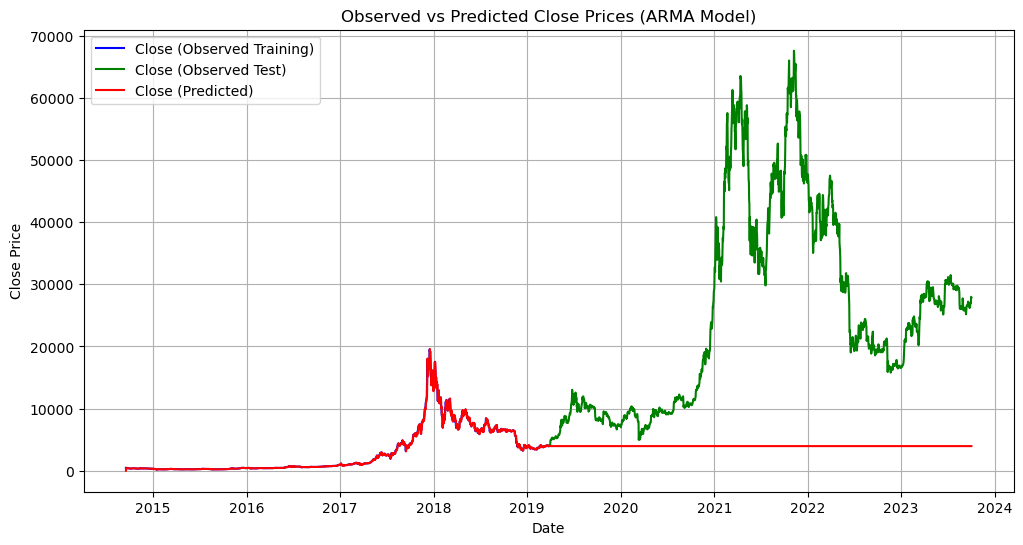

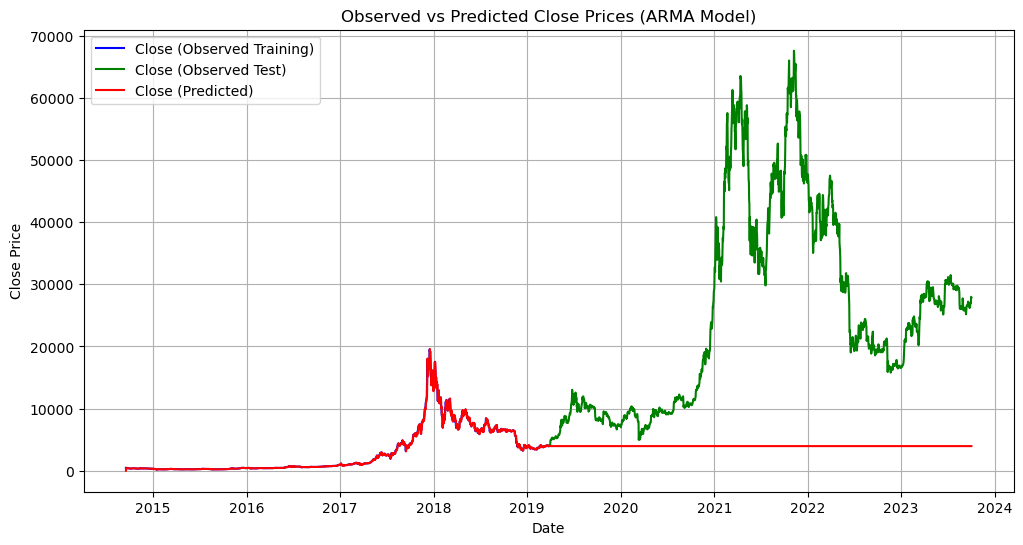

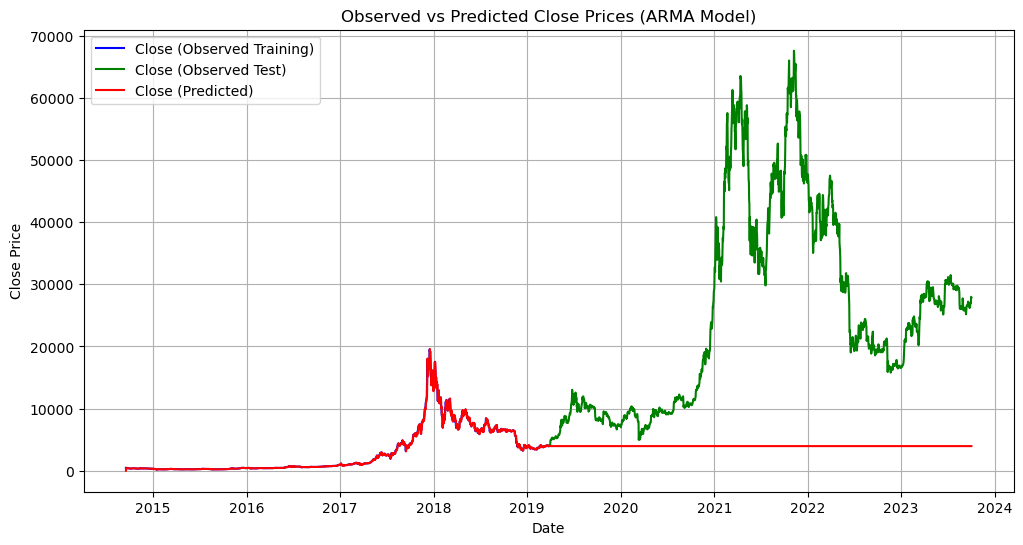

In [23]:
# Faire des prédictions sur l'ensemble d'entraînement
train_pred, train_confint = model.predict_in_sample(return_conf_int=True)

# Faire des prédictions sur l'ensemble de test
n_periods = len(test_data)
predicted, confint = model.predict(n_periods=n_periods, return_conf_int=True)

# Concaténer les prédictions pour l'ensemble d'entraînement et de test
all_predictions = pd.concat([pd.Series(train_pred, index=train_data.index), 
                             pd.Series(predicted, index=test_data.index)], 
                            axis=0)

# Tracer les valeurs réelles et les prédictions pour l'ensemble d'entraînement et de test
plt.figure(figsize=(12, 6))
plt.plot(train_data, label='Close (Observed Training)', color='blue')
plt.plot(test_data, label='Close (Observed Test)', color='green')
plt.plot(all_predictions, label='Close (Predicted)', color='red')

plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Observed vs Predicted Close Prices (ARMA Model)')
plt.legend()
plt.grid(True)
plt.show()


In [9]:
# Calculer les mesures de performance sur l'ensemble d'entraînement
train_mae = mean_absolute_error(train_data, train_pred)
train_mse = mean_squared_error(train_data, train_pred)
train_rmse = mean_squared_error(train_data, train_pred, squared=False)
train_r2 = r2_score(train_data, train_pred)

# Calculer les mesures de performance sur l'ensemble de test
test_mae = mean_absolute_error(test_data, predicted)
test_mse = mean_squared_error(test_data, predicted)
test_rmse = mean_squared_error(test_data, predicted, squared=False)
test_r2 = r2_score(test_data, predicted)

# Créer un DataFrame pour afficher les mesures de performance
performance_df = pd.DataFrame({
    'Métrique': ['MAE', 'MSE', 'RMSE', 'R²'],
    'Ensemble d\'entraînement': [train_mae, train_mse, train_rmse, train_r2],
    'Ensemble de test': [test_mae, test_mse, test_rmse, test_r2]
})

print(performance_df)




NameError: name 'mean_absolute_error' is not defined

NameError: name 'mean_absolute_error' is not defined

NameError: name 'mean_absolute_error' is not defined